In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../input/employee-future-prediction/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [5]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## EDA

In [6]:
df.groupby('LeaveOrNot')['LeaveOrNot'].count()

LeaveOrNot
0    3053
1    1600
Name: LeaveOrNot, dtype: int64

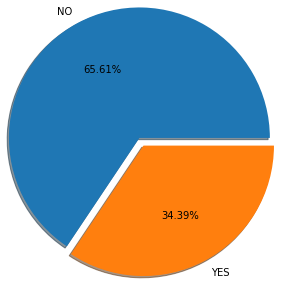

In [7]:
plt.pie(df.groupby('LeaveOrNot')['LeaveOrNot'].count(),labels=['NO','YES'],autopct='%.2f%%',radius=1.5,explode = (0, 0.1),shadow=True)
plt.show()

**Let's find proportion of employees leaving on the basis of various factors**

## Education

In [8]:
d1=pd.DataFrame(df.groupby(['Education','LeaveOrNot'])['Education'].count())
d1

Education
Education LeaveOrNot           
Bachelors 0                2472
          1                1129
Masters   0                 447
          1                 426
PHD       0                 134
          1                  45

In [9]:
prop_df=[]
for val in np.sort(df['Education'].unique()):
    prop=d1['Education'][val][1]/(d1['Education'][val][1]+d1['Education'][val][0])
    prop_df.append({
        'Education':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Education,proportion
1,Masters,0.487973
0,Bachelors,0.313524
2,PHD,0.251397


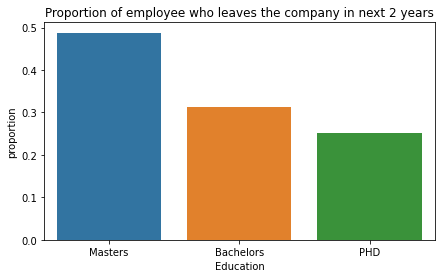

In [10]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['Education'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('Education')
plt.show()

**Insight:** Masters degree are most likely to leave the company

## Joining Year

In [11]:
d1=pd.DataFrame(df.groupby(['JoiningYear','LeaveOrNot'])['JoiningYear'].count())
d1

JoiningYear
JoiningYear LeaveOrNot             
2012        0                   395
            1                   109
2013        0                   445
            1                   224
2014        0                   526
            1                   173
2015        0                   463
            1                   318
2016        0                   408
            1                   117
2017        0                   811
            1                   297
2018        0                     5
            1                   362

In [12]:
prop_df=[]
for val in np.sort(df['JoiningYear'].unique()):
    prop=d1['JoiningYear'][val][1]/(d1['JoiningYear'][val][1]+d1['JoiningYear'][val][0])
    prop_df.append({
        'JoiningYear':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,JoiningYear,proportion
6,2018,0.986376
3,2015,0.407170
1,2013,0.334828
5,2017,0.268051
2,2014,0.247496
4,2016,0.222857
0,2012,0.216270


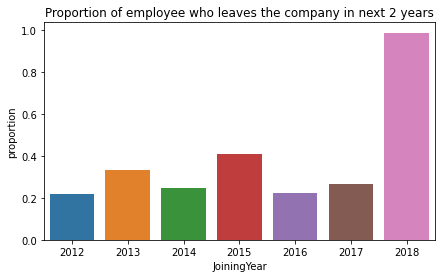

In [13]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['JoiningYear'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('JoiningYear')
plt.show()

**Insight:** New hires are more likely to leave, maybe they are dissatisfied with their positions.

## City

In [14]:
d1=pd.DataFrame(df.groupby(['City','LeaveOrNot'])['City'].count())
d1

City
City      LeaveOrNot      
Bangalore 0           1633
          1            595
New Delhi 0            791
          1            366
Pune      0            629
          1            639

In [15]:
prop_df=[]
for val in np.sort(df['City'].unique()):
    prop=d1['City'][val][1]/(d1['City'][val][1]+d1['City'][val][0])
    prop_df.append({
        'City':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,City,proportion
2,Pune,0.503943
1,New Delhi,0.316335
0,Bangalore,0.267056


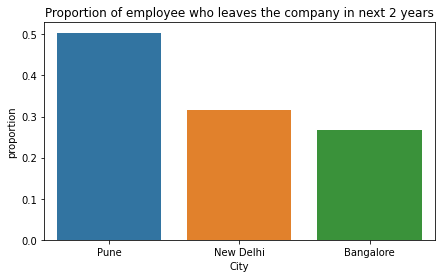

In [16]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['City'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('City')
plt.show()

**Insight:** Employees working in Pune are most likely to leave; one possible explanation is the establishment of a new IT cluster in Pune, which would provide new opportunities.

## PaymentTier

In [17]:
d1=pd.DataFrame(df.groupby(['PaymentTier','LeaveOrNot'])['PaymentTier'].count())
d1

PaymentTier
PaymentTier LeaveOrNot             
1           0                   154
            1                    89
2           0                   368
            1                   550
3           0                  2531
            1                   961

In [18]:
prop_df=[]
for val in np.sort(df['PaymentTier'].unique()):
    prop=d1['PaymentTier'][val][1]/(d1['PaymentTier'][val][1]+d1['PaymentTier'][val][0])
    prop_df.append({
        'PaymentTier':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,PaymentTier,proportion
1,2,0.599129
0,1,0.366255
2,3,0.275200


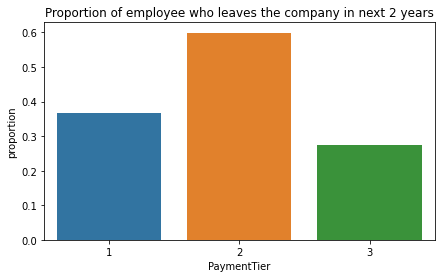

In [19]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['PaymentTier'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('PaymentTier')
plt.show()

**Insight:** Employees with PaymentTier 2 are more inclined to depart, possibly because to increased advancement opportunities

## Age

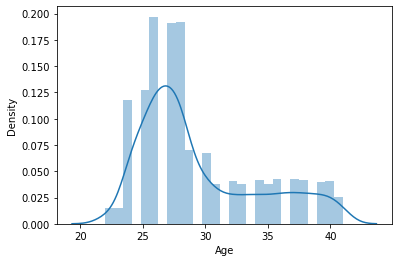

In [20]:
sns.distplot(df['Age'])
plt.show()

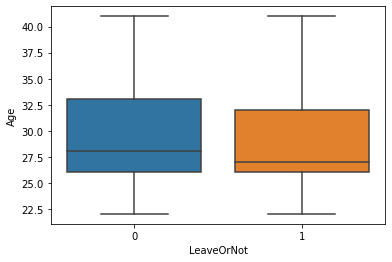

In [21]:
sns.boxplot(x=df['LeaveOrNot'],y=df['Age'])
plt.show()

**Insight:** Median age of employees leaving is lower

## Gender

In [22]:
d1=pd.DataFrame(df.groupby(['Gender','LeaveOrNot'])['Gender'].count())
d1

Gender
Gender LeaveOrNot        
Female 0              991
       1              884
Male   0             2062
       1              716

In [23]:
prop_df=[]
for val in np.sort(df['Gender'].unique()):
    prop=d1['Gender'][val][1]/(d1['Gender'][val][1]+d1['Gender'][val][0])
    prop_df.append({
        'Gender':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Gender,proportion
0,Female,0.471467
1,Male,0.257739


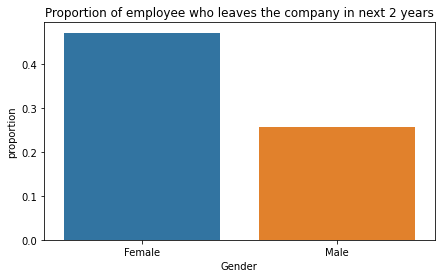

In [24]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['Gender'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('Gender')
plt.show()

**Insight:** Due to family obligations, female employees are more likely to depart

## EverBenched

In [25]:
d1=pd.DataFrame(df.groupby(['EverBenched','LeaveOrNot'])['EverBenched'].count())
d1

EverBenched
EverBenched LeaveOrNot             
No          0                  2792
            1                  1383
Yes         0                   261
            1                   217

In [26]:
prop_df=[]
for val in np.sort(df['EverBenched'].unique()):
    prop=d1['EverBenched'][val][1]/(d1['EverBenched'][val][1]+d1['EverBenched'][val][0])
    prop_df.append({
        'EverBenched':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,EverBenched,proportion
1,Yes,0.453975
0,No,0.331257


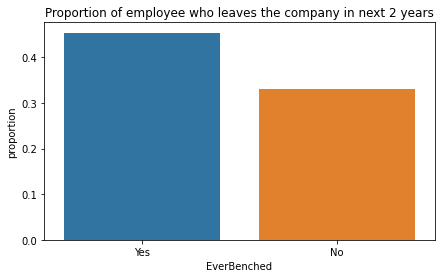

In [27]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['EverBenched'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('EverBenched')
plt.show()

**Insight**: Most of the employee who were benched left the company

## ExperienceInCurrentDomain

In [28]:
d1=pd.DataFrame(df.groupby(['ExperienceInCurrentDomain','LeaveOrNot'])['ExperienceInCurrentDomain'].count())
d1

ExperienceInCurrentDomain
ExperienceInCurrentDomain LeaveOrNot                           
0                         0                                 231
                          1                                 124
1                         0                                 370
                          1                                 188
2                         0                                 688
                          1                                 399
3                         0                                 487
                          1                                 299
4                         0                                 634
                          1                                 297
5                         0                                 631
                          1                                 288
6                         0                                   6
                          1                                   2
7                         0                                   6
                          1                                   3

In [29]:
prop_df=[]
for val in np.sort(df['ExperienceInCurrentDomain'].unique()):
    prop=d1['ExperienceInCurrentDomain'][val][1]/(d1['ExperienceInCurrentDomain'][val][1]+d1['ExperienceInCurrentDomain'][val][0])
    prop_df.append({
        'ExperienceInCurrentDomain':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,ExperienceInCurrentDomain,proportion
3,3,0.380407
2,2,0.367065
0,0,0.349296
1,1,0.336918
7,7,0.333333
4,4,0.319012
5,5,0.313384
6,6,0.250000


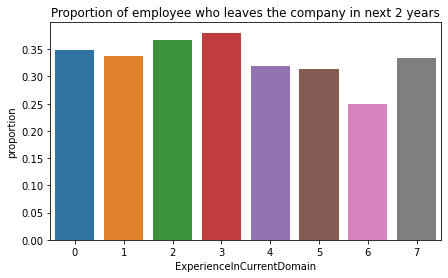

In [30]:
plt.figure(figsize=(7,4))
sns.barplot(x=prop_df['ExperienceInCurrentDomain'],y=prop_df['proportion'])
plt.title("Proportion of employee who leaves the company in next 2 years")
plt.xlabel('ExperienceInCurrentDomain')
plt.show()

## Feature Engineering

In [31]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
cat_cols=['Education','JoiningYear','City','Gender','EverBenched']

In [34]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [35]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,3,34,1,0,0,0
1,0,1,2,1,28,0,0,3,1
2,0,2,1,3,38,0,0,2,0
3,1,4,0,3,27,1,0,5,1
4,1,5,2,3,24,1,1,2,1


## Model Building

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y= df.pop('LeaveOrNot')
X= df

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
scores=[]

from sklearn.metrics import f1_score

## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
# Prediction on train
y_train_pred= model.predict(X_train)

In [43]:
# Prediction on train
y_test_pred= model.predict(X_test)

In [44]:
# Performance on test dataset
## Accuracy
model.score(X_train,y_train)

0.9315320847405588

In [45]:
## f1-score
f1_score(y_train,y_train_pred)

0.8925301204819277

In [46]:
# Performance on test dataset
## Accuracy
model.score(X_test,y_test)

0.8302292263610315

In [47]:
## f1-score
f1_score(y_test,y_test_pred)

0.7363737486095663

In [48]:
scores.append({
        'model': 'Decision Tree Classifier',
        'score': model.score(X_test,y_test),
        'f1_score' : f1_score(y_test,y_test_pred)
    })

## Random Forest Classifier 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model= RandomForestClassifier(n_estimators=50, random_state=42)

In [51]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [52]:
# Prediction on train
y_train_pred= model.predict(X_train)

# Prediction on test
y_test_pred= model.predict(X_test)

In [53]:
# Performance on train dataset
## Accuracy
model.score(X_train,y_train)

0.9306109917101627

In [54]:
## f1-score
f1_score(y_train,y_train_pred)

0.8939962476547842

In [55]:
# Performance on test dataset
## Accuracy
model.score(X_test,y_test)

0.8481375358166189

In [56]:
## f1-score
f1_score(y_test,y_test_pred)

0.7617977528089888

In [57]:
scores.append({
        'model': 'Random Forest Classifier',
        'score': model.score(X_test,y_test),
        'f1_score' : f1_score(y_test,y_test_pred)
    })

## Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
model=  GradientBoostingClassifier()

In [60]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [61]:
# Prediction on train
y_train_pred= model.predict(X_train)

# Prediction on test
y_test_pred= model.predict(X_test)

In [62]:
# Performance on train dataset
## Accuracy
model.score(X_train,y_train)

0.8474055879643844

In [63]:
## f1-score
f1_score(y_train,y_train_pred)

0.7423535510627268

In [64]:
# Performance on test dataset
## Accuracy
model.score(X_test,y_test)

0.8581661891117478

In [65]:
## f1-score
f1_score(y_test,y_test_pred)

0.7620192307692308

In [66]:
scores.append({
        'model': 'Gradient Boosting Classifier',
        'score': model.score(X_test,y_test),
        'f1_score' : f1_score(y_test,y_test_pred)
    })

In [67]:
Score = pd.DataFrame(scores,columns=['model','score','f1_score'])
Score.sort_values('score',ascending=False,inplace=True)
Score

,model,score,f1_score
2,Gradient Boosting Classifier,0.858166,0.762019
1,Random Forest Classifier,0.848138,0.761798
0,Decision Tree Classifier,0.830229,0.736374


#### Conclusion: Gradient Boosting Classifier is the best model among all in terms of performance on unseen data (test data)